# Robot entrega galletas

Vamos a crear por programación genética un robot que entregue la mayor cantidad posible de galletas a los ingenieros en cierto numero de movimientos

In [1]:
import random
from deap import base, creator, tools, algorithms

## Parámetros

Definimos el tamaño de la sala, el número de ingenieros, y la cantidad máxima de movimientos

In [2]:
# Definiciones básicas
GRID_SIZE = 10  # Tamaño de la sala
NUM_ENGINEERS = 5  # Número de ingenieros
MAX_STEPS = 50  # Número máximo de pasos en el programa

Generamos las posiciónes de los ingenieros, el robot empieza en la esquina

In [3]:
# Posiciones iniciales
initial_robot_pos = (0, 0)
engineers_positions = {(random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)) for _ in range(NUM_ENGINEERS)}

# Movimiento

Definimos instrucciones para cada tipo de movimiento y para evaluar un individuo en particular, esta es nuestra función de fitness. Evalua cuantas galletas entregamos.

In [4]:
# Instrucciones para el movimiento del robot
def move_north(pos): return max(pos[0] - 1, 0), pos[1]
def move_south(pos): return min(pos[0] + 1, GRID_SIZE - 1), pos[1]
def move_east(pos): return pos[0], min(pos[1] + 1, GRID_SIZE - 1)
def move_west(pos): return pos[0], max(pos[1] - 1, 0)

INSTRUCTIONS = [move_north, move_south, move_east, move_west]

# Función de aptitud
def evaluate(individual):
    robot_pos = initial_robot_pos
    points = 0
    delivered = set()

    for gene in individual:
        robot_pos = INSTRUCTIONS[gene](robot_pos)
        if robot_pos in engineers_positions and robot_pos not in delivered:
            points += 1
            delivered.add(robot_pos)

    return points,

## Estrategia de evolución

In [5]:
# Configuración de DEAP para Programación Genética
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Cada movimiento se representa con un entero
toolbox.register("attr_int", random.randint, 0, len(INSTRUCTIONS)-1)
# Los individuos tienne n movimientos
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=MAX_STEPS)
# La poblacion es una lista de individuos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# La evaluación es la definida previamente
toolbox.register("evaluate", evaluate)
# El cruce es a partir de un punto aleatorio y mezcla de dos padres
toolbox.register("mate", tools.cxTwoPoint)
# La mutación altera los movimientos
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(INSTRUCTIONS)-1, indpb=0.1)
# La seleción se da por método de torneo
toolbox.register("select", tools.selTournament, tournsize=3)

## Loop de evolución

Parametros del algoritmo

In [6]:
# Tamaño de la población
POPSIZE = 300
# Número de generaciones
NGEN = 40
# Probabilidad de cruce
CXPB = 0.5
# Probabilidad de mutación
MUTPB = 0.2

Ahora corremos nuestro algoritmo y elegimos el mejor individuo de la ultima generación

In [7]:
# Crear población inicial
population = toolbox.population(n=POPSIZE)

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    for ind in offspring:
        ind.fitness.values = toolbox.evaluate(ind)
    population = toolbox.select(offspring, k=len(population))

# Seleccionar los mejores individuos
top_individual = tools.selBest(population, k=1)[0]

# Mostrar el mejor individuo y su puntuación
print(f"Mejor individuo(fitness = {top_individual.fitness.values}):")
movs = ["move north", "move south", "move east", "move west"]
for m in top_individual:
   print(f"\t{movs[m]}")

Mejor individuo(fitness = (5.0,)):
	move west
	move west
	move east
	move east
	move south
	move south
	move west
	move east
	move west
	move south
	move west
	move south
	move west
	move east
	move south
	move south
	move south
	move west
	move south
	move south
	move north
	move west
	move west
	move east
	move east
	move south
	move west
	move east
	move east
	move east
	move west
	move east
	move north
	move east
	move south
	move west
	move north
	move south
	move east
	move east
	move west
	move south
	move east
	move south
	move north
	move east
	move east
	move east
	move east
	move north


# Visualización de resultados

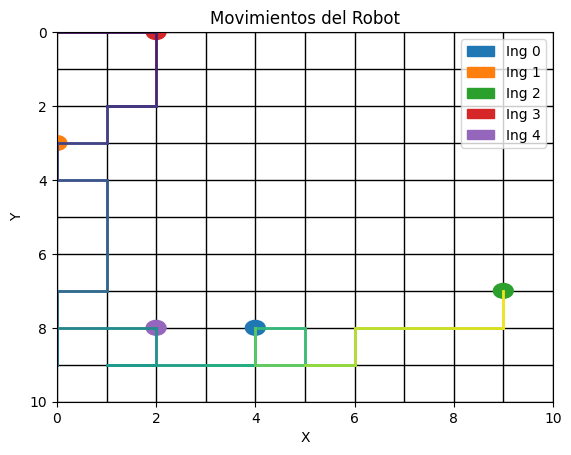

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors


def plot_robot_movements(individual, grid_size, engineers_positions, initial_robot_pos):
    """
    Plotea los movimientos del robot basados en un individuo del algoritmo genético.

    :param individual: Secuencia de instrucciones (individuo) a evaluar.
    :param grid_size: Tamaño de la cuadrícula.
    :param engineers_positions: Conjunto de posiciones de los ingenieros.
    :param initial_robot_pos: Posición inicial del robot.
    """

    INSTRUCTIONS = [move_north, move_south, move_east, move_west]

    # Inicializa la posición del robot y prepara la traza de su movimiento
    robot_pos = initial_robot_pos
    path_x, path_y = [robot_pos[1]], [robot_pos[0]]  # Invertimos x y y para el plot

    # Ejecuta el programa (individuo)
    for gene in individual:
        robot_pos = INSTRUCTIONS[gene](robot_pos)
        path_x.append(robot_pos[1])
        path_y.append(robot_pos[0])

    # Crear plot
    fig, ax = plt.subplots()

    # Dibujar la cuadrícula
    for x in range(grid_size + 1):
        ax.axhline(x, lw=1, color="black", zorder=0)
        ax.axvline(x, lw=1, color="black", zorder=0)

    # Dibujar los ingenieros
    colors = list(mcolors.TABLEAU_COLORS.values())  # Lista de colores únicos
    engineer_colors = {
        pos: colors[i % len(colors)] for i, pos in enumerate(engineers_positions)
    }
    for i, (pos, color) in enumerate(engineer_colors.items()):
        eng = patches.Circle(
            (pos[1], pos[0]),
            radius=0.2,
            linewidth=1,
            color=color,
            fill=True,
            label=f"Ing {i}",
        )
        ax.add_patch(eng)

    # Dibujar el camino del robot
    #  ax.plot(path_x, path_y, color='blue', linewidth=2, marker='o', markersize=5)
    num_points = len(path_x) - 1
    for i in range(num_points):
        ax.plot(
            path_x[i : i + 2],
            path_y[i : i + 2],
            color=plt.cm.viridis(i / num_points),
            linewidth=2,
        )
   

    # Configurar límites y etiquetas
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Movimientos del Robot")

    ax.legend()

    plt.gca().invert_yaxis()  # Invertir el eje Y para que coincida con la lógica de coordenadas
    plt.show()


# Ejemplo de uso:
# Suponiendo que tenemos un individuo (secuencia de instrucciones)
# example_individual = [0, 0, 3, 2, 2, 1, 1, 1, 0, 0]  # Esta secuencia es arbitraria

# Llamar a la función para visualizar los movimientos
plot_robot_movements(top_individual, GRID_SIZE, engineers_positions, initial_robot_pos)

Podemos visualizar el camino de nuestro robot que y como alcanza a los ingenieros